<a href="https://colab.research.google.com/github/DaviCMaciel/LIT/blob/main/LIT_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tarefa 2:
*   Classificador SVM com dataset íris (orquídeas)
*   Treino/Teste 70/30: 30 realizações
*   Exploração no tipo de kernel (gráfico)
*   Exploração no valor de C (gráfico)
*   Exploração no valor de Sigma (gráfico)
*   Resultados:
1.   Acuracia (em box-slot)
2.   Recall   (em box-slot)
3.   Precisão (em box-slot)
4.   F1-score (em box-slot)
5.   Matriz de confusão na acurácia (em percentual)







In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.metrics as metrics
import seaborn

iris = datasets.load_iris()

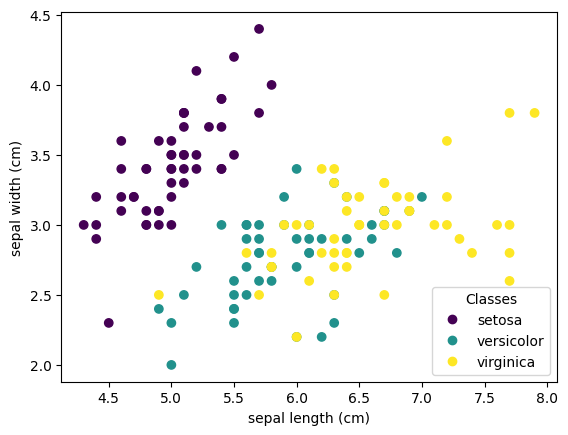

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

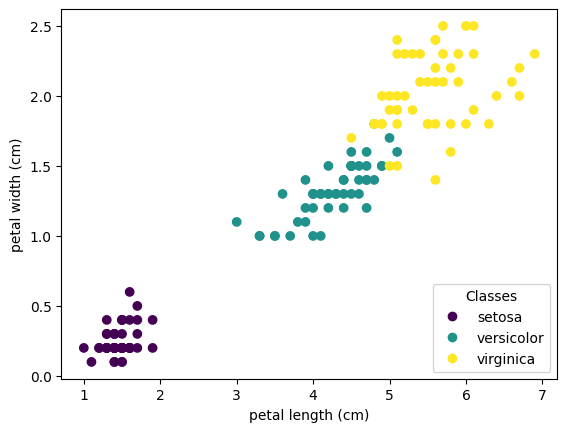

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target

iris_df

iris1 = iris_df.loc[iris_df.target.isin([0,1,2]), ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)', 'target']]

x1 = iris1[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']]
x2 = iris1[['petal length (cm)',	'petal width (cm)']]
y = iris1['target']


In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y, test_size=0.3, random_state=32)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y, test_size=0.3, random_state=32)

In [ ]:
modelo1 = SVC(C=0.1)
modelo1.fit(x1_train, y1_train)
modelo1.score(x1_test, y1_test)

0.9111111111111111

In [ ]:
modelo2 = SVC(C=0.1)
modelo2.fit(x2_train, y2_train)
modelo2.score(x2_test, y2_test)

0.9555555555555556

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
medidas = ['Acuracias', 'Recall', 'Precisão', 'F1-Score']
valores_c = [100, 10, 1, 0.1, 0.01]
valores_sigma = []
resultados = {kernel: {'Acuracias': [], 'Recall': [], 'Precisão': [], 'F1-Score': []} for kernel in kernels}

In [ ]:
for i in range(1,31):
  x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y, test_size=0.3, random_state=i)
  for k in kernels:
    svm = SVC(kernel=k)
    svm.fit(x1_train, y1_train)
    y_pred = svm.predict(x1_test)
    acc = metrics.accuracy_score(y1_test, y_pred)
    rec = metrics.recall_score(y1_test, y_pred, average='macro', zero_division = 0)
    pre = metrics.precision_score(y1_test, y_pred, average='macro',  zero_division = 0)
    f1s = metrics.f1_score(y1_test, y_pred, average='macro',  zero_division = 0)

    resultados[k]['Acuracias'].append( acc * 100)
    resultados[k]['Recall'].append( rec * 100)
    resultados[k]["Precisão"].append( pre * 100)
    resultados[k]['F1-Score'].append( f1s * 100)

In [ ]:
resultados_c = {kernel: { C: {'Acuracias': [], 'Recall': [], 'Precisão': [], 'F1-Score': []} for C in valores_c } for kernel in kernels}

for c in valores_c:
  Xc_train, Xc_test, yc_train, yc_test = train_test_split(x1,y, test_size=0.3, random_state = 42)
  for k in kernels:
    svmc = SVC(kernel=k, C = c)
    svmc.fit(Xc_train, yc_train)
    yc_pred = svmc.predict(Xc_test)
    acc = metrics.accuracy_score(yc_test, yc_pred)
    rec = metrics.recall_score(yc_test, yc_pred, average='macro', zero_division = 0)
    pre = metrics.precision_score(yc_test, yc_pred, average='macro',  zero_division = 0)
    f1s = metrics.f1_score(yc_test, yc_pred, average='macro',  zero_division = 0)
    resultados_c[k][c]['Acuracias'].append( acc * 100)
    resultados_c[k][c]['Recall'].append( rec * 100)
    resultados_c[k][c]["Precisão"].append( pre * 100)
    resultados_c[k][c]['F1-Score'].append( f1s * 100)


In [ ]:
dados_acuracia = []

for c in valores_c:
    for kernel in kernels:
        for acuracia in resultados_c[kernel][c]['Acuracias']:
            dados_acuracia.append({
                'Kernel': kernel,
                'C': c,
                'Acurácia (%)': acuracia
            })

df_acuracia = pd.DataFrame(dados_acuracia)

print("Tabela de Acurácia por Valor de C e Kernel:")
print(df_acuracia)


Tabela de Acurácia por Valor de C e Kernel:
     Kernel       C  Acurácia (%)
0    linear  100.00    100.000000
1      poly  100.00    100.000000
2       rbf  100.00     97.777778
3   sigmoid  100.00      0.000000
4    linear   10.00     97.777778
5      poly   10.00    100.000000
6       rbf   10.00    100.000000
7   sigmoid   10.00      2.222222
8    linear    1.00    100.000000
9      poly    1.00     97.777778
10      rbf    1.00    100.000000
11  sigmoid    1.00     22.222222
12   linear    0.10    100.000000
13     poly    0.10    100.000000
14      rbf    0.10     97.777778
15  sigmoid    0.10     22.222222
16   linear    0.01     97.777778
17     poly    0.01     97.777778
18      rbf    0.01     55.555556
19  sigmoid    0.01     22.222222


In [ ]:
df_acuracias = pd.DataFrame({kernel: resultados[kernel]['Acuracias'] for kernel in kernels})
df_recall = pd.DataFrame({kernel: resultados[kernel]['Recall'] for kernel in kernels})
df_precisao = pd.DataFrame({kernel: resultados[kernel]['Precisão'] for kernel in kernels})
df_f1_score = pd.DataFrame({kernel: resultados[kernel]['F1-Score'] for kernel in kernels})

df_acuracias_melted = df_acuracias.melt(var_name="Kernel", value_name="Acuracia")
df_recall_melted = df_recall.melt(var_name="Kernel", value_name = "Recall")
df_precisao_melted = df_precisao.melt(var_name="Kernel", value_name="Precisão")
df_f1_score_melted = df_f1_score.melt(var_name="Kernel", value_name = "F1-Score")

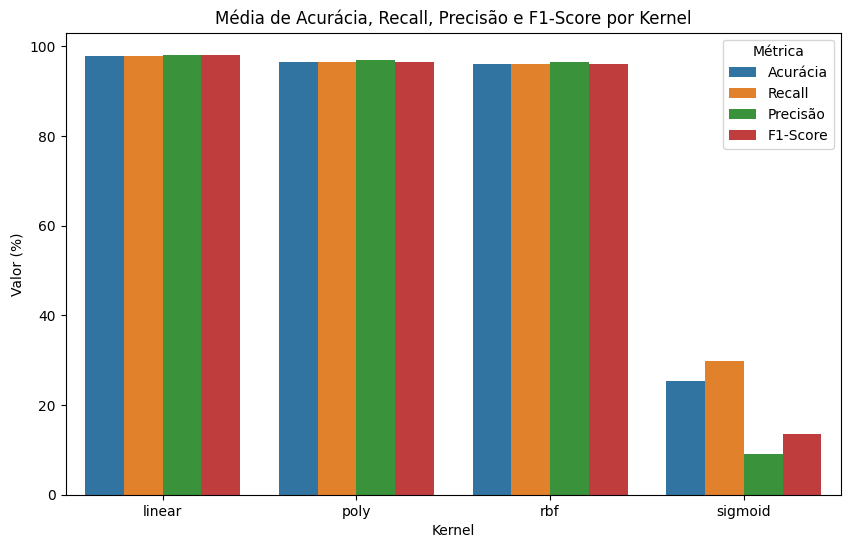

In [ ]:
medias_acuracia = df_acuracias.mean()
medias_recall = df_recall.mean()
medias_precisao = df_precisao.mean()
medias_f1_score = df_f1_score.mean()


df_medias = pd.DataFrame({
    'Kernel': kernels,
    'Acurácia': medias_acuracia.values,
    'Recall': medias_recall.values,
    'Precisão': medias_precisao.values,
    'F1-Score': medias_f1_score.values
})


df_medias_melted = df_medias.melt(id_vars="Kernel", var_name="Métrica", value_name="Valor")


plt.figure(figsize=(10, 6))
seaborn.barplot(data=df_medias_melted, x="Kernel", y="Valor", hue="Métrica")
plt.title("Média de Acurácia, Recall, Precisão e F1-Score por Kernel")
plt.ylabel("Valor (%)")
plt.xlabel("Kernel")
plt.legend(title="Métrica")
plt.show()

In [ ]:
print('Valores da média de Acuracia')
medias_acuracia

Valores da média de Acuracia
Valores da média do Recall
Valores da média da Precisão
Valores da média do F1-Score


,0
linear,97.947836
poly,96.489920
rbf,96.102210
sigmoid,13.635408


In [ ]:
print('Valores da média do Recall')
medias_recall

Valores da média do Recall


,0
linear,97.919830
poly,96.471320
rbf,96.135180
sigmoid,29.800163


In [ ]:
print('Valores da média do Recall')
medias_recall

Valores da média do Recall


,0
linear,97.919830
poly,96.471320
rbf,96.135180
sigmoid,29.800163


In [ ]:
print('Valores da média do F1-Score')
medias_f1_score

Valores da média do F1-Score


,0
linear,97.947836
poly,96.489920
rbf,96.102210
sigmoid,13.635408


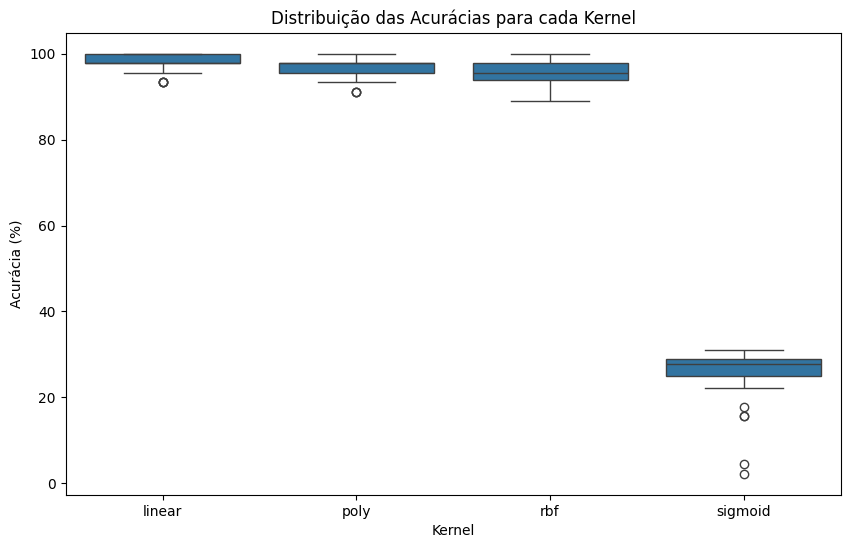

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=df_acuracias_melted, x="Kernel", y="Acuracia")
plt.title("Distribuição das Acurácias para cada Kernel")
plt.ylabel("Acurácia (%)")
plt.xlabel("Kernel")
plt.show()

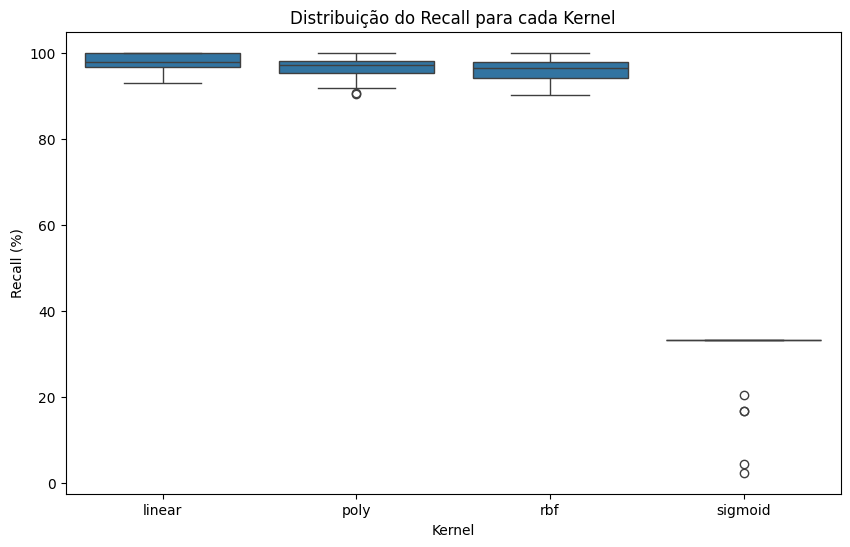

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=df_recall_melted, x="Kernel", y="Recall")
plt.title("Distribuição do Recall para cada Kernel")
plt.ylabel("Recall (%)")
plt.xlabel("Kernel")
plt.show()

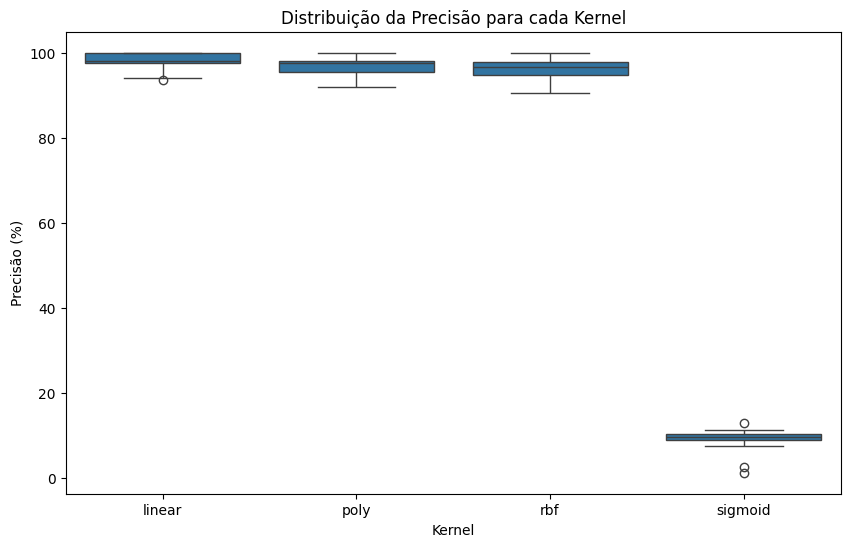

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=df_precisao_melted , x="Kernel", y="Precisão")
plt.title("Distribuição da Precisão para cada Kernel")
plt.ylabel("Precisão (%)")
plt.xlabel("Kernel")
plt.show()

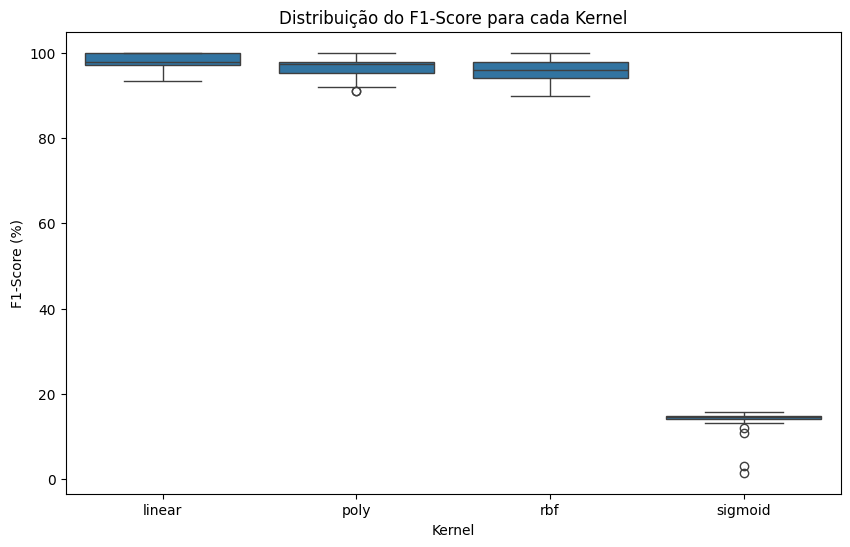

In [ ]:
plt.figure(figsize=(10, 6))
seaborn.boxplot(data=df_f1_score_melted , x="Kernel", y="F1-Score")
plt.title("Distribuição do F1-Score para cada Kernel")
plt.ylabel("F1-Score (%)")
plt.xlabel("Kernel")
plt.show()